In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import tweepy
from tweepy import OAuthHandler

In [55]:

## Set Connection

consumer_key = "0XoyFFInhdZAKZ5aHtH0hE8T9"
consumer_secret = "RxXYHuMMMPp37Z070TOtFFRmBAuGr7z3CbM0Z57Hh272llRdYp"
access_token = "937210653177032704-uOTcpQX86JvGwPCQR47eLUaZX2vmIFT"
access_token_secret = "njqGu106dmfTFR2LksrSZE50nr7q0wp3TpfKS32wQ9s3W"

#We have use the about credentials to authenticate the API

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [56]:
##To get the tweets in a proper format, first we create a dataframe to store the extracted data.

df = pd.DataFrame(columns = ["Date","User","IsVerified","Tweet","Likes","RT","User_location"])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [57]:
#Function to extract tweets

def get_tweets(Topic, Count):
    i=0
    for tweet in tweepy.Cursor(api.search, q =Topic, count =100, lang ="en", exclude = 'retweets').items():
        print(i, end = '\r')
        df.loc[i,"Date"] =tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i, "Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        
        #Save as csv
        #df.to_csv("TweetDataset.csv",index =False)
        #Save as excel
        df.to_excel('{}.xlsx'.format("TweetDataset"),index =False)
        
        i =i+1
        if i>Count :
            break
        else:
            pass

In [58]:
Topic = ["Obama"]
get_tweets(Topic, Count =200)

In [59]:
df.head(10)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-07-10 16:10:11,🎥👻Josh😱Coonrod📽🧟‍♂️,False,Do you think Obama has ever considered listeni...,0,0,"Louisville, KY"
1,2021-07-10 16:10:10,carson,False,@eunivrz obama has astronaut in the ocean on h...,0,0,he/him 14
2,2021-07-10 16:09:59,gunner (status: kickin back),False,wow can’t believe Swagdaddy Sensei &amp; Gunne...,0,0,"Washington, USA"
3,2021-07-10 16:09:55,❗️❗️❗️OTIS❗️❗️❗️,False,@BarackObama OBAMA LISTENS TO LATIN JAZZ NO,0,0,
4,2021-07-10 16:09:54,Forest Garner,False,@SebWrites @cb27words @GimmeNature1976 I wish ...,0,0,
5,2021-07-10 16:09:54,︎︎︎BigBoyBilly33︎︎🍥,False,im very disappointed mr obama why are you list...,0,0,yo mama house
6,2021-07-10 16:09:46,Dave,False,@ananavarro Because in politics like religion ...,0,0,"Warwick, England"
7,2021-07-10 16:09:39,jojo²⁸ • loves mat,False,barack obama has taste https://t.co/OZWR5CpauG,0,0,track 2 𓃰
8,2021-07-10 16:09:29,Get Ben Simmons Out of My City!,False,@fauxfresh I can see Obama blasting daisy lane...,0,0,Hunting for thick pussy
9,2021-07-10 16:09:28,princess morbuck$,False,Thanks Obama! https://t.co/Q1xMhfd30l,0,0,"md,va,wa"


# Preprocessing the Data

In [60]:
#Function to clean the Tweet

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(w+:\/\/\s+)|([RT])|(https://)', ' ',str(tweet).lower()).split())

In [61]:
#Call function to get clean tweets
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))

# Analysing sentiment using Textblob

In [62]:
from textblob import TextBlob

In [63]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity >0 :
        return 'Positive'
    elif analysis.sentiment.polarity ==0 :
        return 'Neutral'
    else :
        return 'Negative'

In [64]:
#Call function to get sentiments
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))

In [65]:
#Summary of a random tweet
n =20
print("Original tweet : \n", df['Tweet'][n])
print()
print("Clean tweet : \n", df['clean_tweet'][n])
print()
print("Sentiment of the tweet : \n", df['Sentiment'][n])

Original tweet : 
 THIS IS NOT RANDOM! President Trump's Cases Against Big Tech Assigned to Two OBAMA Judges and One HW BUSH Judge https://t.co/5QJwzuCSs0

Clean tweet : 
 this is not random president trump s cases against big tech assigned to two obama judges and one hw bush judge t co 5qjwzucss0

Sentiment of the tweet : 
 Positive


In [66]:
df["Sentiment"].value_counts()

Neutral     92
Positive    63
Negative    46
Name: Sentiment, dtype: int64

In [67]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Summary of counts for Total Tweets')

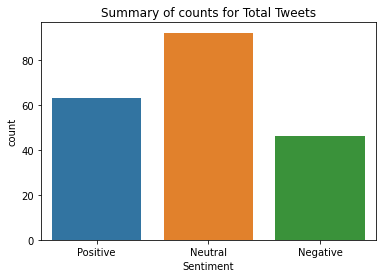

In [68]:
##sns.countplot

sns.countplot(df["Sentiment"])
plt.title("Summary of counts for Total Tweets")

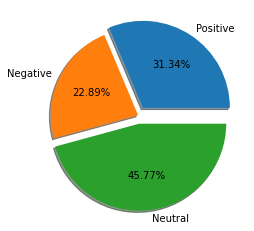

In [69]:
#Pie chart

a=len(df[df["Sentiment"]=="Positive"])
b =len(df[df["Sentiment"]=="Negative"])
c = len(df[df["Sentiment"] == "Neutral"])
d= np.array([a,b,c])
explode = (0.1,0.0,0.1)
plt.pie(d,shadow =True, explode = explode, labels = ["Positive","Negative", "Neutral"],autopct = '%1.2f%%');

Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

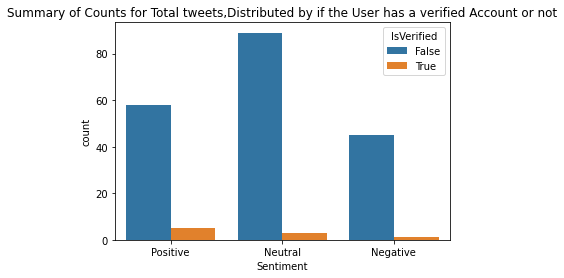

In [70]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")